#Центральная предельная теорема своими руками

##Описание
В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне. 

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?


In [102]:
# Импротируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

##1. Выберите ваше любимое непрерывное распределение
- Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). 
- Сгенерируйте из него выборку объёма 1000, 
- постройте гистограмму выборки и 
- нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Я выбрал функцию плотности вероятности для арксинуса
$$f(x) = \frac{1}{\pi\sqrt{(x(1-x))}}$$
за ее график в виде "стакана". Действительно интересно, как этот график превратится в "волшебную шляпу" из видео.

среднее = 0.5, отклонение = 0.125



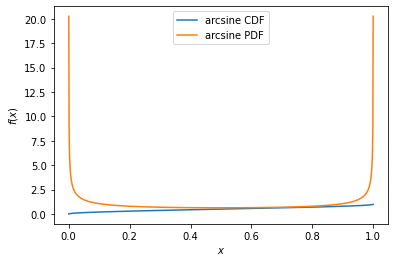

In [103]:
# задаем функцию и смотрим ее среднее и отклонение
arcs = sts.arcsine
fig, ax = plt.subplots(1, 1)

# они нам понадобятся позже
mean, var = arcs.stats(moments='mv')
print(f'среднее = {mean}, отклонение = {var}\n')

# задаем Х для графика
x = np.linspace(arcs.ppf(0.01), arcs.ppf(0.99), 1000)

# from statsmodels.distributions.empirical_distribution import ECDF
# ecdf = ECDF(sample)
# plt.step(ecdf.x, ecdf.y, label='ECDF')

# здесь рисуем график функции распределения
cdf = arcs.cdf(x)
ax.plot(x, cdf, label='arcsine CDF')

# и здесь же функцию плотности распределения вероятности
pdf = arcs.pdf(x)
ax.plot(x, pdf, label='arcsine PDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper center')



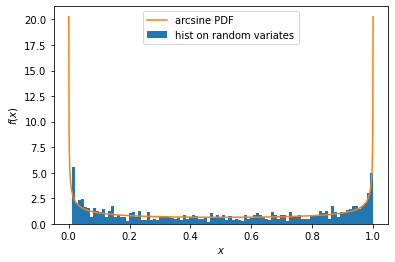

In [104]:
# генерируем выборку объема 1000
sample = arcs.rvs(0.01, 0.99, 1000)

fig, ax = plt.subplots(1, 1)
# гистограмма по элементам случайной выборки
ax.hist(sample, bins=100, density=True, label='hist on random variates')
# плотность распределения
ax.plot(x, pdf, label='arcsine PDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper center')

Видим, что гистограмма по случайной выборке неплохо совпадает с графиком теоретической плотности распределения.

##Выборочное среднее по n


In [105]:
# функция для создания массива из 1000 средних по выборке размером n
def mass_mean(f_x, n):
    means = list()
    for i in range(1000):
        temp_variates = f_x.rvs(0.01, 0.99, n)
        means.append(temp_variates.mean())
    return means

Нарисуем гистограмму по 1000 выборочных средних из выборок размером 5
и наложим график нормального распределения.

Параметры нормального распределения:
- Матожидание в данном случае - переменная **mean** из нашей функции **arcsine** объявленная вначале.
- Дисперсия - $\sqrt\frac{var}{n}$, где **n** - кол-во элементов выборки, **var** - стандартное отклонение нашей функции **arcsine**.

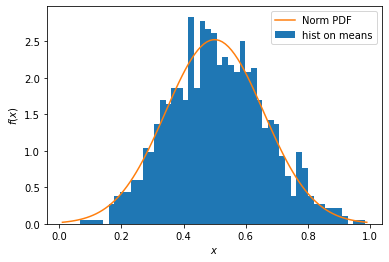

In [106]:
# гистограмма по элементам случайной выборки размера 5
n = 5
means = mass_mean(arcs, n)
plt.hist(means, bins=25, density=True, label='hist on means')

# нормальное распределение по теоретическому среднему и теоретической дисперсии
norm = sts.norm(mean, (var/n)**0.5)
x = np.linspace(0.01, 0.99, 100)
pdf = norm.pdf(x)
plt.plot(x, pdf, label='Norm PDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper right')

Автоматизируем процес для разного **n**

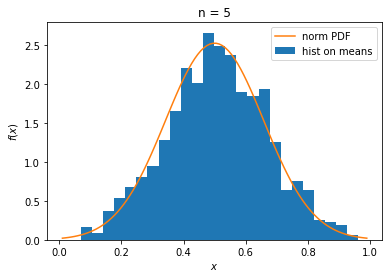

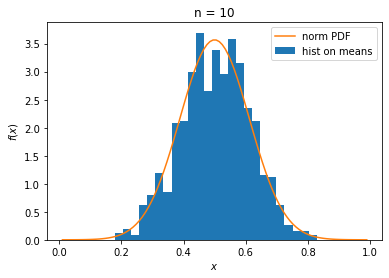

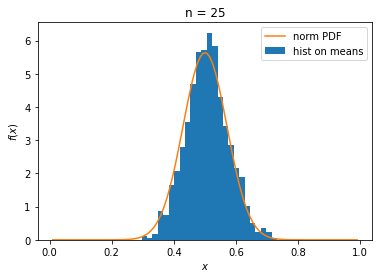

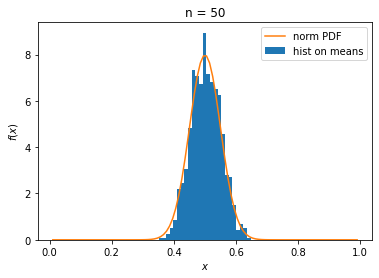

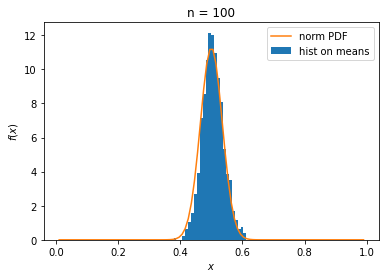

In [108]:
# автоматизируем процесс для n = 5, 10, 25, 50, 100
# гистограмма по элементам случайной выборки размера 5
for n in[5, 10, 25, 50, 100]:
    means = mass_mean(arcs, n)
    # plt.hist(means, normed = True)
    plt.hist(means, bins=25, density=True, label='hist on means')
    # нормальное распределение по теоретическому среднему и стандартному оклонению нашей функции
    norm = sts.norm(mean, (var/n)**0.5)
    x = np.linspace(0.01, 0.99, 100)
    pdf = norm.pdf(x)
    plt.plot(x, pdf, label='norm PDF')

    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend(loc='upper right') 
    plt.title(f'n = {n}')
    plt.show()

##Вывод
Мы действительно видим, что при увеличении выборки (**n**), гистограмма по средним все больше приближается к нормальному распределению. 

Что и следовало доказать.